K-means is an unsupervised learning algorithm used to clustering. K-means partitions data into k clusters in which each data point belongs to the cluster with the nearest cluster center or centroid. A data point is considered to be in a specific cluster if it is closer to that cluster's centroid than any other centroid.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

Creating the dataset. 

In [2]:
data = {'Latitude': [-2.029569077, -2.01, -2.02, -2.34, -1.86, -1.86968888, -1.82904347, -2.346298104, -2.353926845], 
        'Longitude': [29.44330656, 29.37, 29.44, 30.12, 30.63, 30.52819565, 30.68824005, 30.29404761, 30.06876205]}

data = pd.DataFrame(data=data)
data

,Latitude,Longitude
0,-2.029569,29.443307
1,-2.010000,29.370000
2,-2.020000,29.440000
3,-2.340000,30.120000
4,-1.860000,30.630000
5,-1.869689,30.528196
6,-1.829043,30.688240
7,-2.346298,30.294048
8,-2.353927,30.068762


Plot the data to see possible clusters (if any).

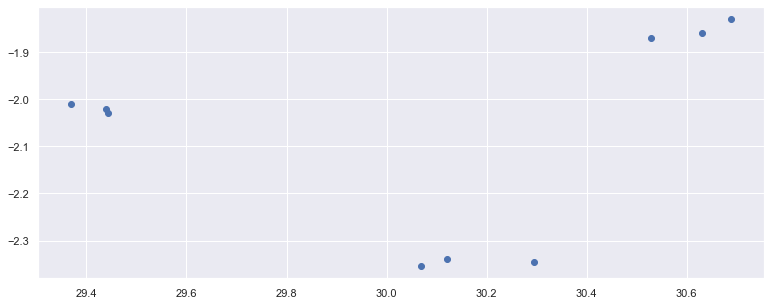

In [3]:
fig = plt.figure(1, figsize=(13, 5))
plt.scatter(data['Longitude'],data['Latitude'])
plt.show()

We can see that there are clusters in our data based on locations. Some points are closer to certain points than they are to others. It is a good example to use for clustering algorithms. Let us use KMeans to fit the data.

In [4]:
kmeans = KMeans(3) #We specify the number of clusters as 3
kmeans.fit(data)

KMeans(n_clusters=3)

Let's identify clusters in our data.

In [5]:
identified_clusters = kmeans.fit_predict(data)
identified_clusters

array([0, 0, 0, 2, 1, 1, 1, 2, 2])

Now, we plot the data (with colors) to see the identified clusters.

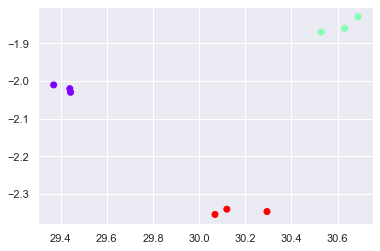

In [6]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')

This corresponds to to our intuition based on the number of clusters we specified earlier. However, sometimes data may be multidimensional, thus resulting in a difficult task of visually determining the number of clusters. Consequently, you can no longer determine the OPTIMAL number of clusters to use for the algorithm. Since the number of clusters must be specified beforehand, it is necessary to find ways to determine the optimal number of clusters before.

One of the ways to determine the optimal number of clusters is to use the elbow method, which plots the relationship between the Within-Cluster-Sum-of-Squares (WCSS) and the number of clusters. The point where the graph starts to level off denotes the number of clusters. See the graph below for our example. 

Text(0, 0.5, 'WCSS')

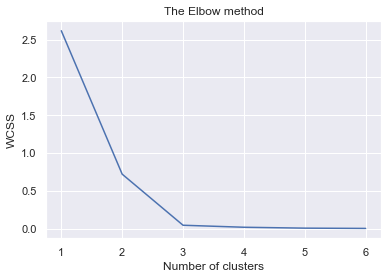

In [7]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(data)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

The graph levels off at number 3, which corresponds to our proposed number. This is how you determine the number of clusters, even in the most complex dataset where it would be intractable to visually inspect the data and possibly the number of clusters (if any).

Useful resources:
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
- https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/